1. 
(2 points) Load a json file of Doge Coin tweets from the period Feb 2 - Feb 8, 2021. After loading them, put the following information into a dataframe:
The full text of the Tweet. (string)
The author of the tweet, that is their username (string)
Whether or not it is a retweet. (boolean)
The timestamp. (datetime)
The date (YYYY-MM-DD) of the Tweet. (date)
Hint: list comprehensions can be your best friend!

(2 points) Create a "clean_text" column by doing the following to "full_text":

removing links, which are strings that start with "http"
removing hashtags, which are strings that start with "#"
removing mentions, which are strings that start with "@"
converting text to lower case.
removing punctuation.
Now report:

The top 10 most common words besides "doge", "coin", and "dogecoin" (while also omitting stop words).
The top 5 Twitter accounts that are mentioned (hint: use a regular expression).
The top 5 most RT'ed tweets.
The top 5 hashtags besides "#doge" and "dogecoin" (hint: use a regular expression)

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
import emoji
from datetime import timedelta

In [3]:
data = pd.read_json("doge_sample_100k.json")
display(data)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status,extended_entities,possibly_sensitive,display_text_range,extended_tweet
0,2021-02-04 09:11:34+00:00,1357255467198803968,1357255467198803968,hayallerim için dogecoin doge #doge #dogecoin ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,False,False,low,tr,2021-02-04 09:11:34.624,NaN,NaN,NaN,NaN,NaN
1,2021-02-06 04:27:46+00:00,1357908820714901505,1357908820714901504,RT @4ngryDoge: Me watching my investment skyro...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-06 04:27:46.241,{'created_at': 'Sat Feb 06 04:24:30 +0000 2021...,"{'media': [{'id': 1357907161255473155, 'id_str...",0.0,NaN,NaN
2,2021-02-05 07:56:14+00:00,1357598895090503680,1357598895090503680,The only reason behind the $doge pump is a tra...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-05 07:56:14.214,NaN,NaN,0.0,"[0, 140]",{'full_text': 'The only reason behind the $dog...
3,2021-02-02 16:38:17+00:00,1356643112257425408,1356643112257425408,RT @closfranco: Those selling are going to reg...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-02 16:38:17.829,{'created_at': 'Tue Feb 02 05:23:59 +0000 2021...,NaN,NaN,NaN,NaN
4,2021-02-06 01:04:11+00:00,1357857586301829120,1357857586301829120,@DOGEREVOLUTION1 @KingValhallaWSB #DogecoinToT...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,1.355989e+18,1.355989e+18,...,False,False,low,und,2021-02-06 01:04:11.005,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2021-02-07 01:11:11+00:00,1358221739445084162,1358221739445084160,RT @Dogecoinupdate: Told you to buy at the dip...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-07 01:11:11.880,{'created_at': 'Sun Feb 07 01:00:29 +0000 2021...,NaN,NaN,NaN,NaN
99996,2021-02-04 10:53:26+00:00,1357281103158075393,1357281103158075392,RT @LivingJiyu: Thank you @elonmusk! #Dogecoin...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-04 10:53:26.713,{'created_at': 'Thu Feb 04 10:15:52 +0000 2021...,NaN,NaN,NaN,NaN
99997,2021-02-05 17:38:28+00:00,1357745418189164545,1357745418189164544,RT @ItsDogeCoin: ATTENTION ALL #DOGEARMY MEMBE...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2021-02-05 17:38:28.043,{'created_at': 'Fri Feb 05 16:56:01 +0000 2021...,NaN,NaN,NaN,NaN
99998,2021-02-07 23:39:10+00:00,1358560970830876673,1358560970830876672,#dogecoin,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,False,False,low,und,2021-02-07 23:39:10.945,NaN,NaN,NaN,NaN,NaN


In [4]:
#create_text
clean_text = data['text']

In [5]:
#clean http
cleanLinks = clean_text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [ ]:
cleanLinks

In [6]:
#clean mentioned
clean_mention = cleanLinks.apply(lambda x: re.sub('@[^\s]+','',x))

In [ ]:
clean_mention

In [7]:
#clean hash
clean_hash = clean_mention.apply(lambda x: re.sub('#[^\s]+','',x))

In [ ]:
clean_hash

In [8]:
#to lower case
lower = clean_hash.str.lower()

In [9]:
#take out punctuation
no_punck  = lower.str.replace('[^\w\s]','')

<ipython-input-9-77a822b9a14b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  no_punck  = lower.str.replace('[^\w\s]','')


In [10]:
#import stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [11]:
#generate clean text
data['clean_text']= no_punck .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
data['clean_text']

0                          hayallerim için dogecoin doge 2
1             rt watching investment skyrocket ever tweets
2        reason behind doge pump trading discord 260000...
3                                  rt selling going regret
4                                                         
                               ...                        
99995                                      rt told buy dip
99996                   rt thank crypto people invest hold
99997    rt attention members reply best memes lets see em
99998                                                     
99999    rt hasnt even started yet pumps nothing compar...
Name: clean_text, Length: 100000, dtype: object

In [91]:
#count freequency of word
from collections import Counter

word_count = Counter(" ".join(data['clean_text']).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

In [92]:
word_frequency

,Word,Frequency
0,rt,75223
1,doge,14355
2,lets,9083
3,retweet,9026
4,get,8322
5,buy,7629
6,1,5210
7,hold,4646
8,moon,4507
9,tweet,3847


In [16]:
#find out the most common user names
def find_usernames(text):
    #tweet = re.findall('@[^\s]+','',tweet)
    #tweet = re.sub('http[^\s]+','',tweet)
    #print(tweet)
    word=re.findall(r'(?<=@)\w+',text)
    
    return " ".join(word)
    #return tweet


data['user_names'] = data['text'].apply(lambda x: find_usernames(x))

In [17]:
word_count = Counter(" ".join(data['user_names']).split()).most_common(10)
user_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

In [18]:
user_frequency

,Word,Frequency
0,DogecoinRise,15194
1,elonmusk,10071
2,dogethepup,1670
3,Dogecoinrich,1452
4,itsALLrisky,1448
5,ScottZILWarrior,1394
6,CatTokenFans,1289
7,dogecoin,1244
8,WhaleStreetBets,1192
9,holdthedoge,1166


In [19]:
def find_hash(text):
    #tweet = re.findall('@[^\s]+','',tweet)
    #tweet = re.sub('http[^\s]+','',tweet)
    #print(tweet)
    word=re.findall(r"#(\w+)",text)
    return " ".join(word)
    #return tweet
    
data['hash'] = data['text'].apply(lambda x: find_hash(x))

In [20]:
print(data['hash'])

0            doge dogecoin dogecointo1dollar dogearmy elon
1                                                 dogecoin
2                                                         
3        dogecoin DogecoinToTheMoon dogecointo1dollar d...
4             DogecoinToTheMoon Dogecoin dogecointoadollar
                               ...                        
99995                                             Dogecoin
99996       Dogecoin DOGE DogecoinToTheMoon dogearmy ElonD
99997                                        DOGEARMY doge
99998                                             dogecoin
99999                                             dogecoin
Name: hash, Length: 100000, dtype: object


In [21]:
word_count = Counter(" ".join(data['hash']).split()).most_common()
hash_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

In [22]:
#find hash frequency
hash_frequency


,Word,Frequency
0,dogecoin,37527
1,Dogecoin,24951
2,dogearmy,18737
3,DOGE,18147
4,doge,12229
...,...,...
6972,mlbpicks,1
6973,cybersecurity,1
6974,acmcyber,1
6975,Long,1


In [24]:
#exclude doge and dogecoin coin
hash_frequency[hash_frequency["Word"].str.contains("doge|dogecoin|coin", case=False)==False].head(5)

,Word,Frequency
21,SuperBowl,1293
23,ElonMusk,1216
25,cryptocurrency,1142
28,1,859
29,BUYANDHOLD,840


1. (4 points) Now read in the json file of Elon Musk's tweets.

- Find the minute volume of Elon Musk's tweets, and plot them together with the minute volume of Doge tweets. Interpret what you see. Note on the graph any Elon Musk tweets having to do with Doge Coin.
- On the day Elon Musk tweeted just the word "doge," what were the top 10 words? What are the differences between these and the top 10 most common words in the whole data?

In [62]:
elon_all = pd.read_json("elon_tweets.json")

In [ ]:
elon_all

In [63]:
elon_all['clean_mention'] = elon_all['full_text'].apply(lambda x: re.sub('@[^\s]+','',x))

In [ ]:
elon_all

In [64]:
elon_all['created_at']= pd.to_datetime(elon_all['created_at'], unit='s')

elon_all_count= elon_all.resample('min', on='created_at').size().reset_index(name='count')


In [65]:
elon_all_count.set_index('created_at', inplace=True)

In [70]:
doge_tweet_elon = elon_all[elon_all['clean_mention'].str.contains(r'(?i)Doge', regex=True)]

In [71]:
doge_tweet_elon

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,clean_mention
47,2021-02-21 21:27:06+00:00,1363601164344823810,1363601164344823808,Dojo 4 Doge,False,"[0, 11]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,324672,False,False,NaN,sl,NaN,NaN,NaN,NaN,Dojo 4 Doge
58,2021-02-20 08:42:28+00:00,1363046350900785156,1363046350900785152,@dogecoin I just set up some little Doge minin...,False,"[10, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.362772e+18,...,56676,False,False,NaN,en,NaN,NaN,NaN,NaN,I just set up some little Doge mining rigs wi...
88,2021-02-14 23:33:22+00:00,1361096223428653056,1361096223428653056,@RationalEtienne An acceptable percentage. Dog...,False,"[17, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.361096e+18,...,6178,False,False,NaN,en,NaN,NaN,NaN,NaN,An acceptable percentage. Doge is much more c...
89,2021-02-14 23:25:16+00:00,1361094185412100096,1361094185412100096,If major Dogecoin holders sell most of their c...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,334570,False,False,NaN,en,NaN,NaN,NaN,NaN,If major Dogecoin holders sell most of their c...
100,2021-02-11 23:27:37+00:00,1360007611781795840,1360007611781795840,@gtera27 Doge is underestimated,False,"[9, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.360007e+18,...,28707,False,False,NaN,en,NaN,NaN,NaN,NaN,Doge is underestimated
103,2021-02-11 09:08:33+00:00,1359791422711492608,1359791422711492608,"Frodo was the underdoge,\nAll thought he would...",False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1359791384790720512, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,249738,False,False,0.0,en,NaN,NaN,NaN,NaN,"Frodo was the underdoge,\nAll thought he would..."
111,2021-02-10 15:08:11+00:00,1359519541219500033,1359519541219500032,"Bought some Dogecoin for lil X, so he can be a...",False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,556455,False,False,NaN,en,NaN,NaN,NaN,NaN,"Bought some Dogecoin for lil X, so he can be a..."
131,2021-02-08 05:27:36+00:00,1358648653573992450,1358648653573992448,"@itsALLrisky Doge appears to be inflationary, ...",False,"[13, 234]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.358504e+18,...,13899,False,False,NaN,en,NaN,NaN,NaN,NaN,"Doge appears to be inflationary, but is not m..."
139,2021-02-07 22:25:14+00:00,1358542364948668418,1358542364948668416,🎶 Who let the Doge out 🎶,False,"[0, 24]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,799422,False,False,NaN,en,NaN,NaN,NaN,NaN,🎶 Who let the Doge out 🎶
156,2021-02-06 08:42:25+00:00,1357972904663687173,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.357835e+18,...,9771,False,False,NaN,en,NaN,NaN,NaN,NaN,Dogecake


In [38]:
#create count column to prepare for grapth
doge_tweet_elon['count'] = 1

<ipython-input-38-c80ca2522d2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_tweet_elon['count'] = 1


In [36]:
doge_tweet_elon.set_index('created_at', inplace=True)

In [29]:
doge_tweet_count = data.resample('min', on='created_at').size().reset_index(name='count')


In [31]:
doge_tweet_count.set_index('created_at', inplace=True)

In [138]:
elon_all_count_adj = elon_all_count[elon_all_count.index.isin(doge_tweet_count.index)]

In [139]:
elon_all_count_adj

,count
created_at,
2021-02-02 14:10:00+00:00,0
2021-02-02 14:11:00+00:00,0
2021-02-02 14:12:00+00:00,0
2021-02-02 14:13:00+00:00,0
2021-02-02 14:14:00+00:00,0
...,...
2021-02-08 14:31:00+00:00,0
2021-02-08 14:32:00+00:00,0
2021-02-08 14:33:00+00:00,0


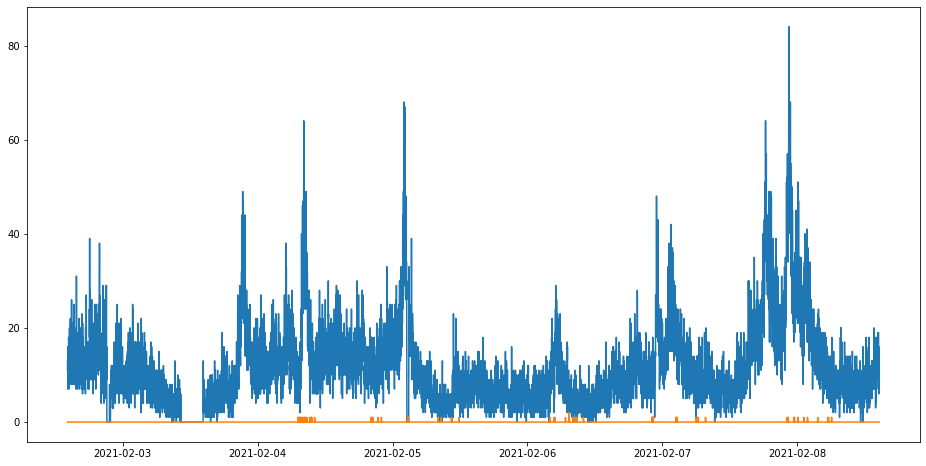

In [140]:
fig = plt.figure(figsize=(16,8))


plt.plot(doge_tweet_count.index, doge_tweet_count['count'])

plt.plot(doge_tweet_count.index,elon_all_count_adj['count'])

In [78]:
one_doge_tweet = doge_tweet_elon[doge_tweet_elon['full_text']=='Doge']
one_doge_tweet['created_at'].values
one_doge_tweet['Date'] = pd.to_datetime(one_doge_tweet['created_at']).dt.date

<ipython-input-78-d2b5ea69684d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_doge_tweet['Date'] = pd.to_datetime(one_doge_tweet['created_at']).dt.date


In [111]:
one_doge_tweet['created_at'].values

array(['2021-02-04T07:35:35.000000000'], dtype='datetime64[ns]')

In [79]:
one_doge_tweet['Date'] 

189    2021-02-04
Name: Date, dtype: object

In [80]:
date_values = one_doge_tweet['Date'].values[0]

In [85]:
data['Date'] = pd.to_datetime(data['created_at']).dt.date

In [104]:
tweeted = data[data['Date'] == date_values]['clean_text']

In [105]:
doge_date_word_count = Counter(" ".join(tweeted).split()).most_common(10)
doge_date_word_frequency = pd.DataFrame(doge_date_word_count, columns = ['Word', 'Frequency'])

In [106]:
doge_date_word_frequency

,Word,Frequency
0,rt,15706
1,doge,3219
2,buy,2269
3,lets,1972
4,retweet,1833
5,get,1569
6,hold,1240
7,dont,1165
8,moon,1129
9,choose,1095


(6 points) Run the Doge Coin tweets through sentiment analysis, and report:

The 5 most negative and 5 most positive tweets.
A graph of the sentiment over time together with tweet volume. Put a dashed verticle line at the timestamp where Elon tweeted just the word "doge."

In [148]:
import nltk

nltk.download('vader_lexicon')
  
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import math
sentiment ={}
j=0
for i in data['clean_text'].values:
    data.loc[data["clean_text"] == i, "sentiment"] = vader.polarity_scores(i)['compound']


3. (6 points) Doge Coin Prices and Tweets.

a. Read in the Doge Coin price data at the 2 minute level and extract the volume, the closing price, and the timestamp. Then create two graphs:

The Doge Coin closing price versus volume during the sample period. Put a dashed verticle line at the timestamp where Elon tweeted just the word "doge." Interpret what the graph shows.
Graph at least the average Doge Coin tweet sentiment and the Doge Coin price. Annotate or graph any other information you think is relevant (Extra Credit Graph: Put "My Submission" at the top of the cell to submit for one extra credit point).
Do you think that Elon Musk moved the price of Doge Coin? Was the effect permanent?
b. Calculate the correlation between the Dog Coin Tweet sentiment and the Doge Coin price in this sample period. Then suppose someone asks you to answer this question: Did positive Twitter sentiment increase the price of Doge Coin from Feb 2 to Feb 8, 2021? Specifically, describe in detail:

The data you would need in addition to these data sources.
The way you would read in the data and manipulate it.
The sort of analysis or statistics you would calculate to answer the question.

In [107]:
price = pd.read_csv("doge_coin_by_2min.csv")
price = price[['Datetime', 'Close', 'Volume']]

In [127]:
print(price['Datetime'])

0       2021-01-29 06:00:00+00:00
1       2021-01-29 06:02:00+00:00
2       2021-01-29 06:04:00+00:00
3       2021-01-29 06:06:00+00:00
4       2021-01-29 06:08:00+00:00
                  ...            
7914    2021-02-09 05:50:00+00:00
7915    2021-02-09 05:52:00+00:00
7916    2021-02-09 05:54:00+00:00
7917    2021-02-09 05:56:00+00:00
7918    2021-02-09 05:58:00+00:00
Name: Datetime, Length: 7919, dtype: object


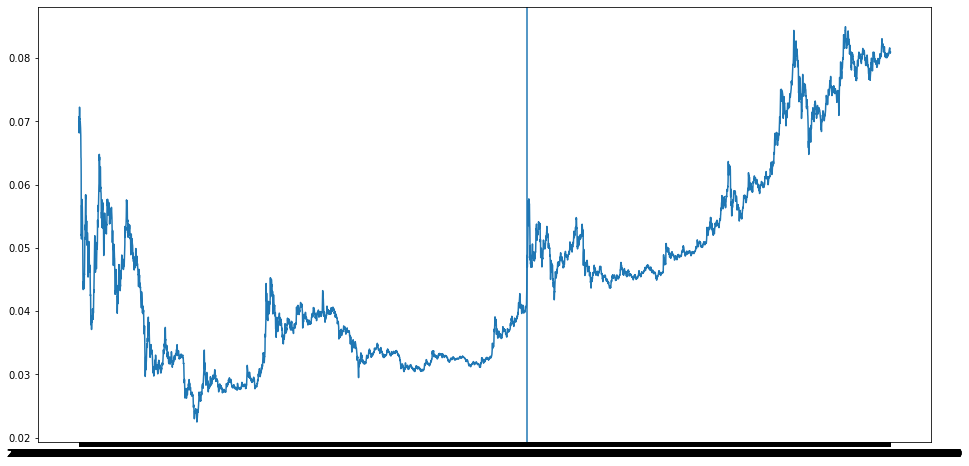

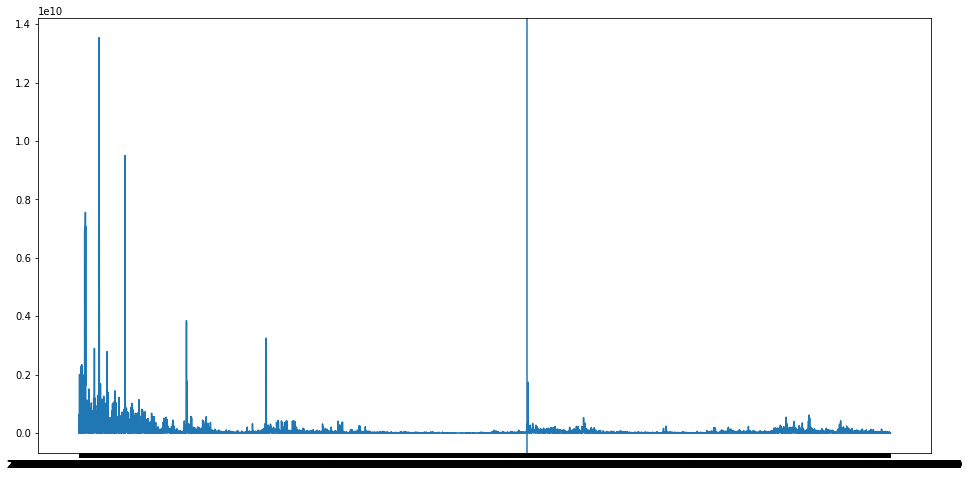

In [147]:
fig = plt.figure(figsize=(16,8))

plt.plot(price['Datetime'], price['Close'])

plt.axvline(x="2021-02-04 07:36:00+00:00")


fig = plt.figure(figsize=(16,8))

plt.plot(price['Datetime'], price['Volume'])

plt.axvline(x="2021-02-04 07:36:00+00:00")
